In [1]:
import numpy as np # 1
import matplotlib.pyplot as plt
class Neuron(): # 2
    def __init__(self): #3
        self.C= .281 # 4
        self.gL = .030 # 5
        self.vR = -60.6 # 6
        self.vT = -50.4 # 7
    def create_injection_current(self): # 8
        self.currentInj =np.append(np.zeros(10),np.arange(100)/100.) # 9
        self.T = len(self.currentInj) # 10
    def leaky_integrate_and_fire(self): # 11
        self.timeseries = np.linspace(0,self.T-1,self.T) # 12
        self.V = np.ones(self.T)*self.vR # 13
        ii=0 # initial the index counter # 14
        while ii < self.T-2: # 15
            dV = (-self.gL*(self.V[ii] - self.vR)+self.currentInj[ii])/self.C # 16
            self.V[ii+1]=self.V[ii]+dV # 17
            if self.V[ii+1]>=self.vT: # 18
                self.V[ii+1]=20 # 19
                self.V[ii+2]=self.vR # 20
                ii+=1 # increment #21
            ii+=1 # Increment outside of the if statement # 22
    def plot_neuron(self): # 23
        fig = plt.figure() # 24
        ax = fig.add_subplot(211) # 25
        ax.plot(self.timeseries,self.currentInj,c='k') # 26
        ax.set_title('current injection',style='italic') # 27
        ax.set_ylabel('current (nA)',style='italic')
        ax2 = fig.add_subplot(212) # 29
        ax2.plot(self.timeseries,self.V,c='k') # 30
        ax2.set_title('integrate and fire voltage response',style='italic') # 31
        ax2.set_xlabel('time (ms)',style='italic') # 32
        ax2.set_ylabel('voltage (mV)',style='italic') # 33
        plt.tight_layout() # 34
        #plt.show() # 35
        plt.savefig('Integrate and fire voltage response.png')

In [2]:
myFirstNeuron = Neuron() # 1
myFirstNeuron.create_injection_current() # 2
myFirstNeuron.leaky_integrate_and_fire() # 3
myFirstNeuron.plot_neuron() # 4

In [7]:
import numpy as np # 1
import matplotlib.pyplot as plt # 1
class Neuron2(): # 2
    def __init__(self): # 3
        self.C= .281 # 4
        self.gL = .030 # 5
        self.vR = -60.6 # 6
        self.vT = -50.4 # 7
    def create_injection_current(self,mag=1): # 8
        self.currentInj = np.arange(100)/100.*mag # 9
        self.T = len(self.currentInj) # 10
    def leaky_integrate_and_fire(self): # 11
        self.timeseries = np.linspace(0,self.T-1,self.T) # 12 
        self.V = np.ones(self.T)*self.vR # 13
        ii=0 # initial the index counter # 14 
        self.spikeCounter=0 # 15
        while ii < self.T-2: # 16
            dV = (-self.gL*(self.V[ii] -self.vR)+self.currentInj[ii])/self.C # 17
            self.V[ii+1]=self.V[ii]+dV # 18
            if self.V[ii+1]>self.vT: # 19
                self.V[ii+1]=20 # 20
                self.V[ii+2]=self.vR # 21
                ii+=1 # 22
                self.spikeCounter+=1 # 23
            ii+=1 # 24

In [8]:
def plotFI(currentMags,spikes): # 25
    fig=plt.figure() # 26
    ax = fig.add_subplot(111) # 27 
    ax.scatter(currentMags,spikes,c='k',edgecolor='w',s=50) # 28 
    ax.set_xlabel('current injection maximum (nA)',style='italic') #29
    ax.set_ylabel('number of spikes',style='italic') # 30 
    ax.set_title('Firing as function of current injected',style='italic') # 31
    #plt.show() # 32
    plt.savefig('Firing as function of current injected.png') #33

In [9]:
spikes=[] # 1
currentMags=np.arange(0.1,10,0.1) # 2 
for mag in currentMags: # 3
    mySecondNeuron = Neuron2() # 4
    mySecondNeuron.create_injection_current(mag) # 5
    mySecondNeuron.leaky_integrate_and_fire() # 6
    spikes.append(mySecondNeuron.spikeCounter) # 7
plotFI(currentMags,spikes) # 8

In [10]:
from scipy.optimize import leastsq # 1
def pevalEq(x,p): # 2
    return p[0] - p[2]*np.exp(-p[1]*x) # 3
def residualsEq(p,y,x): # 4
    err = (y - (p[0] - p[2]*np.exp(-p[1]*x))) # 5
    return err # 6
def eqFit(x,p0,y_meas): # 7
    plsq = leastsq(residualsEq,p0,args=(y_meas,x))#8
    return pevalEq(x, plsq[0]) # 9

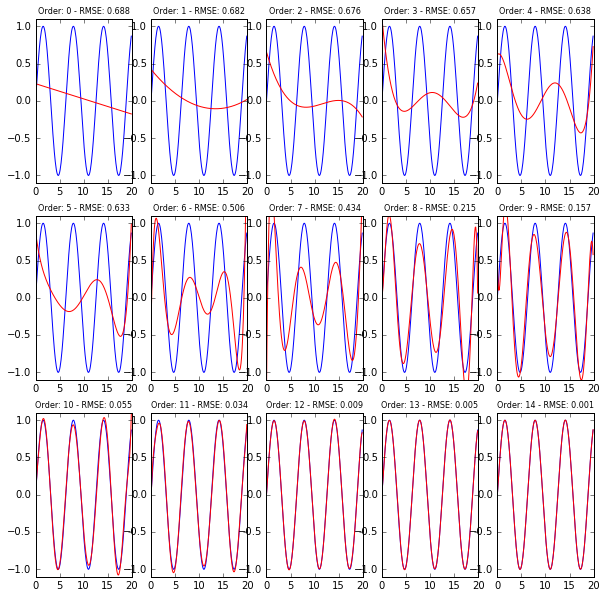

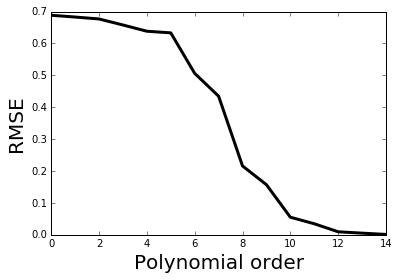

In [11]:
%matplotlib inline
x = np.arange(0,20,0.1)#1
y = np.sin(x) #2
highestOrder = 15 #3
RMSE = np.zeros(highestOrder)#4
f = plt.figure(figsize=(10,10)) #5
for nn in range(highestOrder):#17
    ax = plt.subplot(3,5,nn+1) #6
    p = np.polyfit(x,y,nn+1) #7
    y2 = np.zeros(len(x)) #8
    for ii in range(nn+2): #10
        y2 = y2 + p[ii]*x**(nn-ii+1) #9
    ax.plot(x,y) #11
    ax.plot(x,y2,c='r') #13
    ax.set_ylim([-1.1, 1.1]) #14
    RMSE[nn] = np.sqrt(np.mean((y-y2)**2)); #15
    ax.set_title('Order: '+ str(nn)+ ' - RMSE: '+
str(RMSE[nn])[:5],fontsize=8) #16
f=plt.figure()
plt.plot(range(highestOrder),RMSE,c='k',lw=3) #19
plt.xlabel('Polynomial order',fontsize=20) #20
plt.ylabel('RMSE',fontsize=20) #20

(0.0, 21.900000000000002)

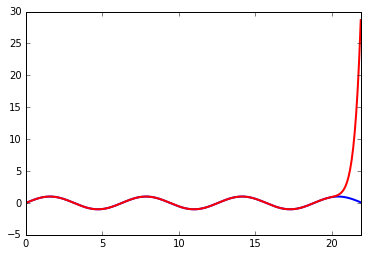

In [12]:
x = np.arange(0,22,.1) #1
y = np.sin(x) #2
y2 = np.zeros(len(x)) #8
for ii in range(nn+2): #10
    y2 = y2 + p[ii]*x**(nn-ii+1)
f=plt.figure() #4
plt.plot(x,y,lw=2) #5
plt.plot(x,y2,c='r',lw=2) #7
rmse = np.sqrt(np.mean((y-y2)**2)) #8
plt.xlim([min(x), max(x)]) #9

In [15]:
from scipy import stats
def rsquared(x,y): #1
    Slope,int_,r_val,p_val,std_err = stats.linregress(x,y)#2
    return r_val**2 # 3
def plotFit(x,y): # 4
    fig = plt.figure() # 5
    y_true = y # 6
    y_noise_added = y_true + np.random.randn(len(x)) #7
    p0 = [40,.4,40] # 8
    y_predict = eqFit(x,p0,y_noise_added) #9
    plt.plot(x, y_predict,c='b',lw=2) #10
    plt.scatter(x,y_true,c='k',s=2) #11
    plt.title('Least-squares fit to exponential') #12
    plt.legend(['Fit, r2 = '+ str(np.round(rsquared(y_predict, y_true),3)),'True'], loc='lower right') #13 
    plt.xlabel('current injected (nA)',style='italic') #14 
    plt.ylabel('spikes',style='italic')#15
plt.show() #16
#plt.savefig('Least squares fit to exponential.png') #17

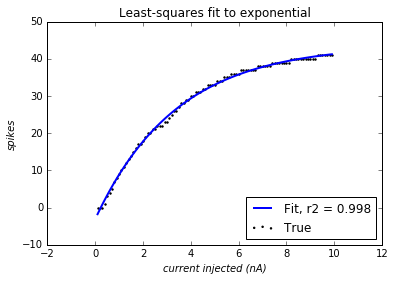

In [16]:
spikes=[] # 1
currentMags=np.arange(0.1,10,0.1) # 2
for mag in currentMags: # 3
    classInstance = Neuron2() #4
    classInstance.create_injection_current(mag) #5
    classInstance.leaky_integrate_and_fire() #6
    spikes.append(classInstance.spikeCounter) #7
plotFit(currentMags,spikes) #8